<a href="https://colab.research.google.com/github/swathivenkatesan87/24ADI003_24BAD122-EXP-5/blob/main/Ex_5_(2)_24BAD122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Swathi
Roll No: 24BAD122

Dataset Loaded Successfully

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1    

/tmp/ipython-input-1556714146.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-1556714146.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

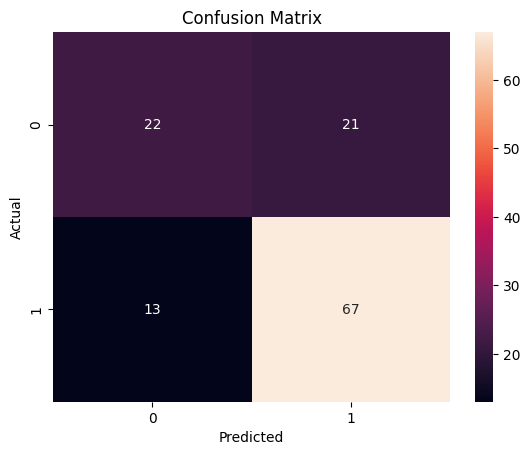

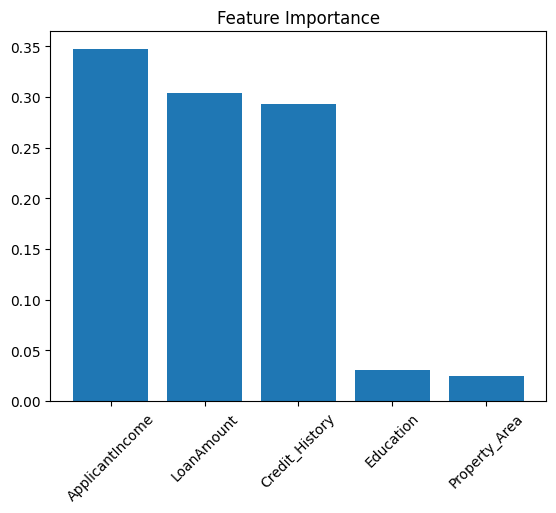

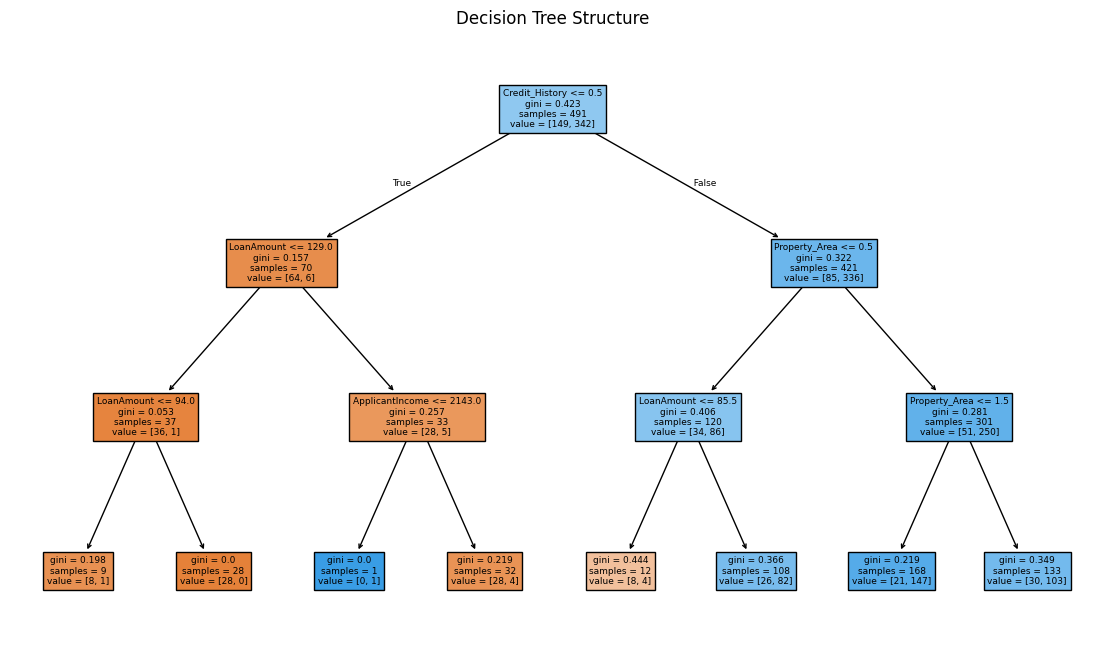


Overfitting Check
Training Accuracy: 1.0
Testing Accuracy: 0.7235772357723578

Program Completed Successfully
Name: Swathi | Roll No: 24BAD122


In [ ]:
# ---------------------------------------------
# Decision Tree Classification – Loan Prediction
# Name : Swathi
# Roll No : 24BAD122
# ---------------------------------------------

# 1. Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load dataset (Download from Kaggle and keep in same folder)
df = pd.read_csv("loan_prediction.csv")

print("Name: Swathi")
print("Roll No: 24BAD122")
print("\nDataset Loaded Successfully\n")

# 3. Basic Data Inspection
print(df.head())
print("\nDataset Info:")
print(df.info())


# Handling Missing Values

for col in df.columns:
    if df[col].dtype == "object":
        # Fill categorical columns with mode
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        # Fill numerical columns with median
        df[col].fillna(df[col].median(), inplace=True)


# Encode categorical variables using LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

# 4. Select Features and Target

X = df[['ApplicantIncome','LoanAmount','Credit_History','Education','Property_Area']]
y = df['Loan_Status']


# 5. Split dataset into training and testing--------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 6. Train Decision Tree Models
# Shallow tree (pruned)
# Deep tree (no pruning)

shallow_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
deep_tree = DecisionTreeClassifier(max_depth=None, random_state=42)

shallow_tree.fit(X_train, y_train)
deep_tree.fit(X_train, y_train)


# 7. Predictions

y_pred_shallow = shallow_tree.predict(X_test)
y_pred_deep = deep_tree.predict(X_test)

# 8. Evaluation Metrics

print("\nShallow Tree Accuracy:", accuracy_score(y_test, y_pred_shallow))
print("Deep Tree Accuracy:", accuracy_score(y_test, y_pred_deep))

print("\nClassification Report (Deep Tree):")
print(classification_report(y_test, y_pred_deep))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_deep)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 9. Feature Importance

importance = deep_tree.feature_importances_
feature_names = X.columns

plt.figure()
plt.bar(feature_names, importance)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()


# 10. Tree Structure Plot (Shallow Tree)

plt.figure(figsize=(14,8))
plot_tree(shallow_tree, feature_names=feature_names, filled=True)
plt.title("Decision Tree Structure")
plt.show()

# 11. Overfitting Detection
# Compare training vs testing accuracy
train_acc = accuracy_score(y_train, deep_tree.predict(X_train))
test_acc = accuracy_score(y_test, y_pred_deep)

print("\nOverfitting Check")
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)


# Program End

print("\nProgram Completed Successfully")
print("Name: Swathi | Roll No: 24BAD122")